### Linear Regression Theory

###### The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

![title](https://miro.medium.com/max/1238/1*r3aOsJoXHX7uC2nxn2lygQ.png)

###### Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. 

#### <font color='red'>The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.</font>

## Approach :

### <font color='blue'> We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.</font>

### <font color='green'> Aim : Based on these features we will predict the quality of the wine. </font>

In [1]:
import time
start = time.process_time()

# import all necessary Libraries

import pandas as pd  
import numpy as np  

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [19]:
## We load the data into variables;which are in the form of dataframes.

vineDataset = pd.read_csv('E:\\Kaggle & ML Projects\\Data Science - ML Models\\Supervised\\Regression problem\\Algorithms\\Linear Regression\\winequality-red Multi LR.csv')

## We used dropna() to remove the rows containing NaN values and now we have dataframes having valid values all together.

vineDataset = vineDataset.dropna() 

In [3]:
vineDataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
vineDataset.shape

(1599, 12)

In [5]:
vineDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [6]:
vineDataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Let us clean our data little bit, So first check which are the columns the contains NaN values in it

vineDataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

###### Divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [8]:
# Independent variable

X = vineDataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

# Dependent variable

y = vineDataset['quality'].values

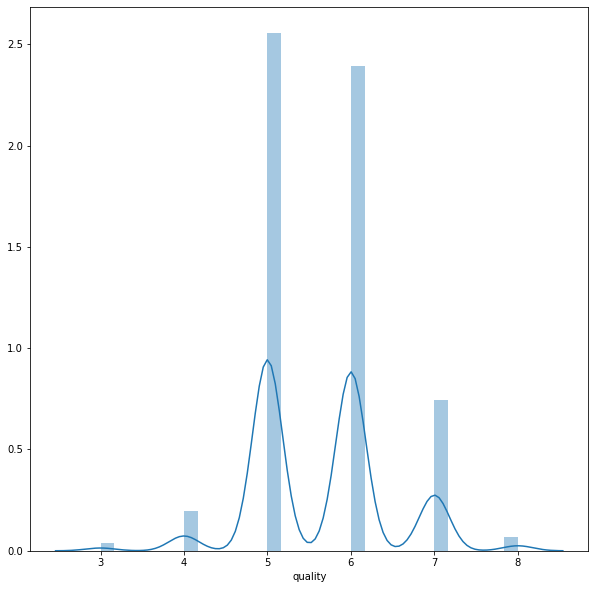

In [9]:
# Check the average value of the “quality” column.

plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(vineDataset['quality'])

###### As we can observe that most of the time the value is either 5 or 6.

#### Now split 80% of the data into Training set while 20% of the data to Test set

#### The test_size variable is where we actually specify the proportion of the Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'))

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

## Train the Model

In [13]:

clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict using model

In [14]:
y_pred = clf.predict(X_test)

print("Intercept of Regression : ", str(clf.intercept_))
print("Slope of Regression : ", str(clf.coef_))


Intercept of Regression :  34.998710628721106
Slope of Regression :  [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


In [15]:
# coeff_df = pd.DataFrame(clf.coef_, X_test.columns, columns=['Coefficient'])  
# coeff_df

![title](https://miro.medium.com/max/336/1*PnZ8R3H7gboxAXA28KtdzA.png)

### Observations :

#### This means that for a unit increase in “density”, there is a decrease of <font color = 'blue'>31.51</font> units in the quality of the wine. 

#### Similarly, a unit decrease in “Chlorides“ results in an increase of <font color = 'blue'>1.87</font> units in the quality of the wine. 

#### We can see that the rest of the features have very little effect on the quality of the wine.

In [16]:
coeff_df = pd.DataFrame(clf.coef_,columns=['Coefficient'])  
coeff_df

,Coefficient
0,0.041284
1,-1.149528
2,-0.177927
3,0.027870
4,-1.873407
5,0.002684
6,-0.002777
7,-31.516666
8,-0.254486
9,0.924040


In [17]:
df = pd.DataFrame({'Actual Vine Quality': y_test, 'Predicted Vine Quality': y_pred})
df1 = df.head(25)
df1

,Actual Vine Quality,Predicted Vine Quality
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


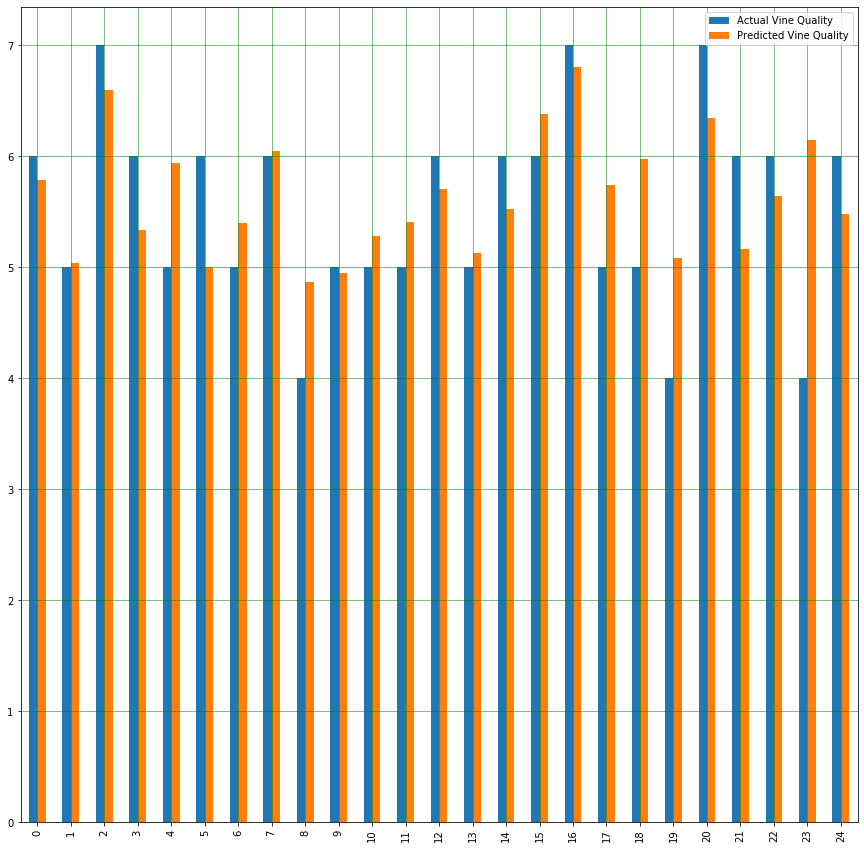

Time consumed to execute complete code : 2.890625 sec


In [18]:
df1.plot(kind='bar',figsize=(15,15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print(f'Time consumed to execute complete code : {time.process_time() - start}',"sec")

## Thank You!   Next --->


## ---- Binary Logistic regression ----